<a href="https://colab.research.google.com/github/duytan118/XU-LY-ANH/blob/main/AI_powered_medical_diagnosis_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Khai báo và sử dụng các thư viện sau

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/

/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration


In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train',target_size=(160,160), batch_size=64, class_mode='categorical')


Found 711 images belonging to 5 classes.


In [6]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Validation',target_size=(160,160), batch_size=64, class_mode='categorical')

Found 396 images belonging to 5 classes.


In [7]:
training.class_indices

{'basal cell carcinoma': 0,
 'dermatofibroma': 1,
 'melanoma': 2,
 'nevus': 3,
 'squamous cell carcinoma': 4}

In [8]:
validation.class_indices

{'basal cell carcinoma': 0,
 'dermatofibroma': 1,
 'melanoma': 2,
 'nevus': 3,
 'squamous cell carcinoma': 4}

In [11]:
model = Sequential()
#Convolutional
model.add(Conv2D(64, kernel_size= (3,3), activation= 'linear', input_shape= (160,160,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'relu', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(256, (3,3), activation= 'relu', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(512, (3,3), activation= 'relu', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
#ANN
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(5, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 160, 160, 64)      1792      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 160, 160, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 80, 80, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 80, 80, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                  

In [13]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học 64 dữ liệu (batch_size), khi sai số không thay đổi trong 80 lần học thì sẽ␣ dừng học 
history=model.fit(training,epochs=100,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=80)])

Epoch 1/100
12/12 [==============================] - 36s 3s/step - loss: 0.5688 - accuracy: 0.7806 - val_loss: 2.1165 - val_accuracy: 0.5177
Epoch 2/100
12/12 [==============================] - 32s 3s/step - loss: 0.4455 - accuracy: 0.8411 - val_loss: 2.3870 - val_accuracy: 0.5202
Epoch 3/100
12/12 [==============================] - 32s 3s/step - loss: 0.4141 - accuracy: 0.8383 - val_loss: 2.4272 - val_accuracy: 0.5101
Epoch 4/100
12/12 [==============================] - 33s 3s/step - loss: 0.3749 - accuracy: 0.8523 - val_loss: 2.3267 - val_accuracy: 0.5278
Epoch 5/100
12/12 [==============================] - 31s 3s/step - loss: 0.3764 - accuracy: 0.8439 - val_loss: 2.4024 - val_accuracy: 0.5631
Epoch 6/100
12/12 [==============================] - 32s 3s/step - loss: 0.3805 - accuracy: 0.8537 - val_loss: 2.7262 - val_accuracy: 0.5480
Epoch 7/100
12/12 [==============================] - 32s 3s/step - loss: 0.3155 - accuracy: 0.8819 - val_loss: 2.5937 - val_accuracy: 0.5631
Epoch 8/100
1

In [14]:
# Lưu 
model.save("Skin_cancer.h5")
model_1=load_model('Skin_cancer.h5')

In [15]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.010702479630708694
Train Accuracy 0.997187077999115


<function matplotlib.pyplot.show(close=None, block=None)>

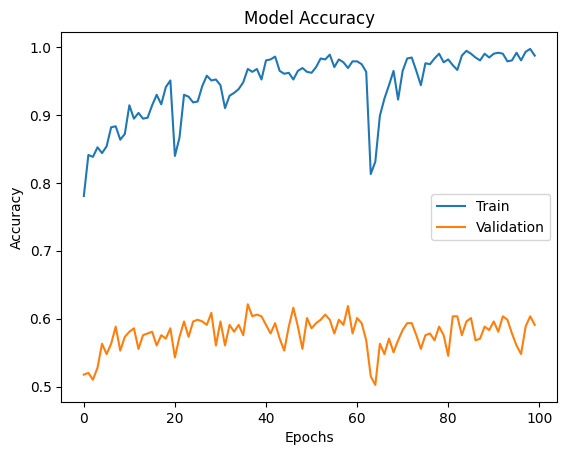

In [16]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show